In [3]:
# Expérience 2 - Prévisibilité dans le modèle de Lorenz63
# Cours SCA-5460 - Laboratoire III
# Par Lindy Pâquet 
# Remis le 17 octobre 2025

# Packages à importer
import os
import numpy as np
import matplotlib.pyplot as plt #utilisé
import xarray as xr # utilisé
import math #utilisé
from mpl_toolkits.mplot3d import Axes3D

In [41]:
# Autre packages (scipy)
!pip install scipy

In [42]:
# Autre package (kolmogorov-smirnov)
from scipy.stats import ks_2samp

In [43]:
# Partie 1 - Solutions numériques du système

# 1.1 - Solution stationnaire

# 1.1.1 - Simulations

def lorenz_euler(rho=1.0, dt=0.001, N=20000):

    # Paramètres du système
    sigma = 10.0
    beta = 2.667

    # Calcul des conditions initiales
    eta = math.sqrt(beta * (rho - 1))
    x0 = eta
    y0 = eta + 3
    z0 = rho - 1

    # Initialisation des listes de résultats
    x, y, z = [x0], [y0], [z0]

    # Boucle d'intégration d'Euler
    for i in range(N):
        # On reprend la forme : variable[t+1] = [équation différentielle] * dt + variable[t]
        x_iplus1 = (sigma * (y[i] - x[i])) * dt + x[i]
        y_iplus1 = ((x[i] * (rho - z[i]) - y[i])) * dt + y[i]
        z_iplus1 = ((x[i] * y[i] - beta * z[i])) * dt + z[i]

        x.append(x_iplus1)
        y.append(y_iplus1)
        z.append(z_iplus1)

    return x, y, z

# Exécution de la simulation
x1, y1, z1 = lorenz_euler(rho=1.0)

print(f"Nombre de points simulés : {len(x1)}")

Nombre de points simulés : 20001


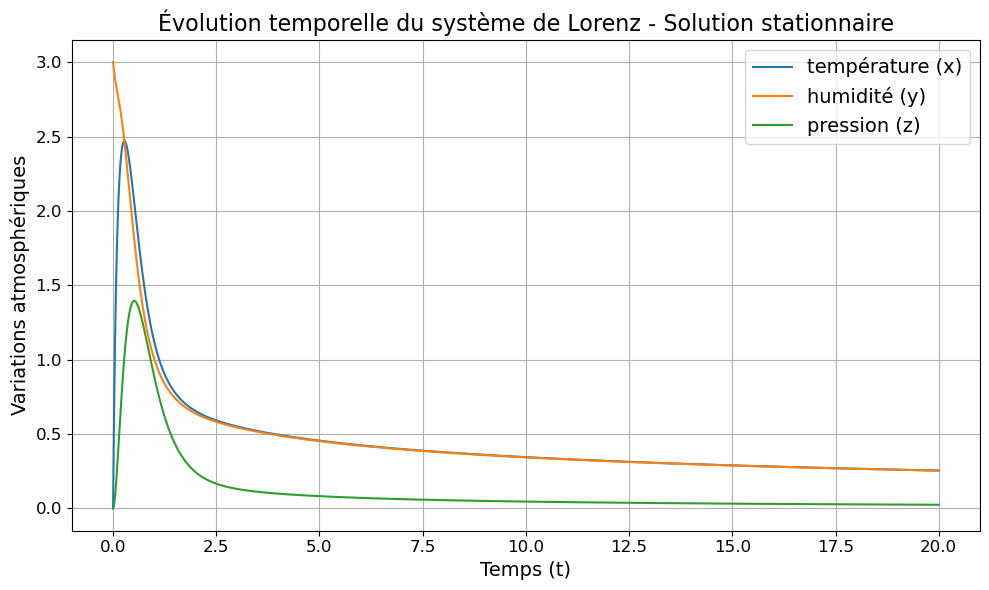

In [44]:
# 1.1.2 Graphique de x,y,z en fonction du temps

# Création de l'axe du temps
dt = 0.001
N = 20000
t = [i * dt for i in range(N + 1)]

# Graphique
plt.figure(figsize=(10, 6))

plt.plot(t, x1, label='température (x)', color='tab:blue')
plt.plot(t, y1, label='humidité (y)', color='tab:orange')
plt.plot(t, z1, label='pression (z)', color='tab:green')

plt.title("Évolution temporelle du système de Lorenz - Solution stationnaire", fontsize=16)
plt.xlabel("Temps (t)", fontsize=14)
plt.ylabel("Variations atmosphériques", fontsize=14)
plt.tick_params(axis='both', labelsize=12)
plt.legend(fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.savefig("Graph_sol_stationnaire.png", dpi=300)
plt.show()

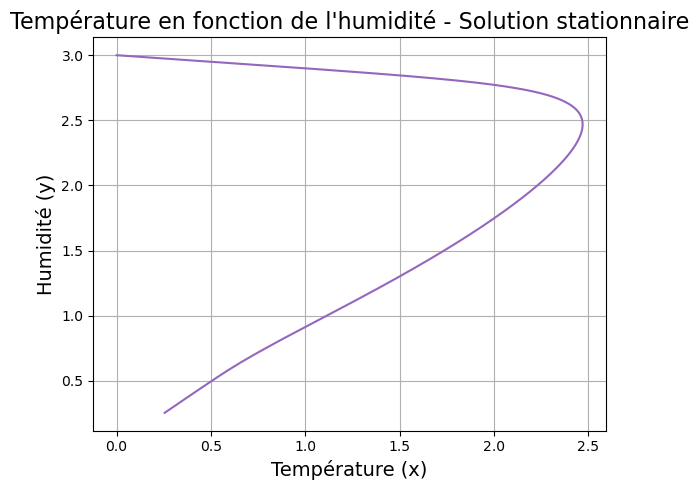

In [45]:
# 1.1.3 Graphique de x en fonction de y

plt.figure(figsize=(6, 5))
plt.plot(x1, y1, color='tab:purple')
plt.title("Température en fonction de l'humidité - Solution stationnaire", fontsize=16)
plt.xlabel("Température (x)", fontsize=14)
plt.ylabel("Humidité (y)", fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.savefig("Graph_sol_stationnaire_xy.png", dpi=300)
plt.show()

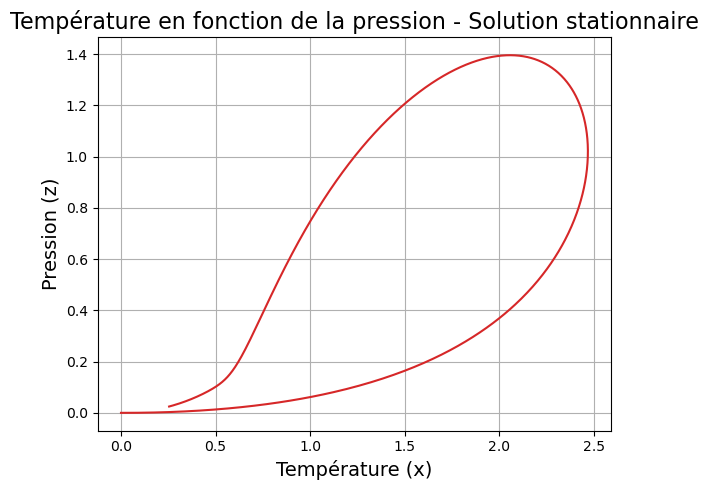

In [46]:
# 1.1.4 Graphique de x en fonction de z

plt.figure(figsize=(6, 5))
plt.plot(x1, z1, color='tab:red')
plt.title("Température en fonction de la pression - Solution stationnaire", fontsize=16)
plt.xlabel("Température (x)", fontsize=14)
plt.ylabel("Pression (z)", fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.savefig("Graph_sol_stationnaire_xz.png", dpi=300)
plt.show()

In [47]:
# 1.2 - Solution périodique

# 1.2.1 - Simulations

# Exécution de la simulation, en changeant seulement la variable rho pour 350.0
x2, y2, z2 = lorenz_euler(rho=350.0)

print(f"Nombre de points simulés : {len(x2)}")

Nombre de points simulés : 20001


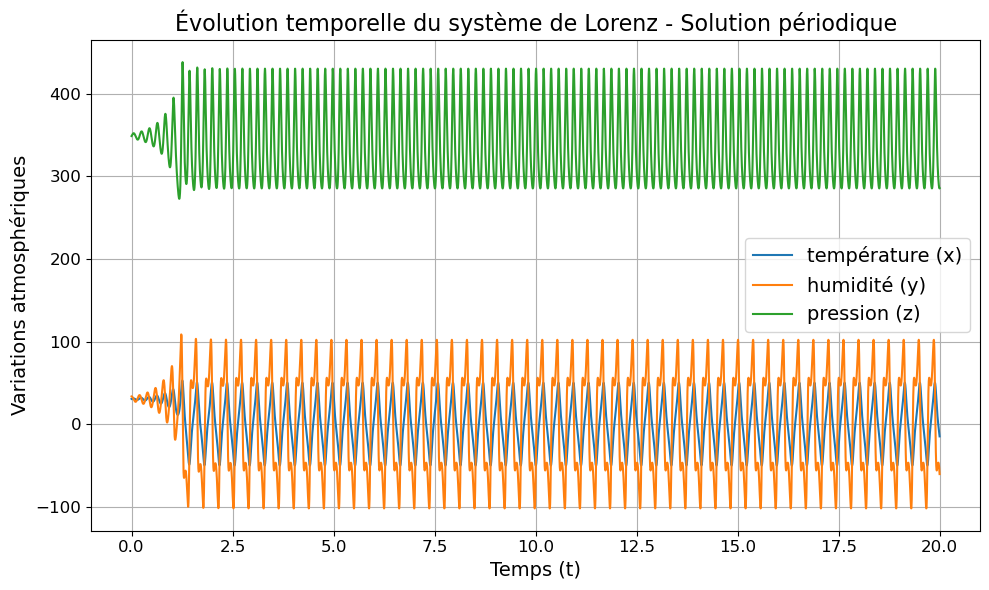

In [48]:
# 1.1.2 Graphique de x,y,z en fonction du temps

# Création de l'axe du temps
dt = 0.001
N = 20000
t = [i * dt for i in range(N + 1)]

# Graphique
plt.figure(figsize=(10, 6))

plt.plot(t, x2, label='température (x)', color='tab:blue')
plt.plot(t, y2, label='humidité (y)', color='tab:orange')
plt.plot(t, z2, label='pression (z)', color='tab:green')

plt.title("Évolution temporelle du système de Lorenz - Solution périodique", fontsize=16)
plt.xlabel("Temps (t)", fontsize=14)
plt.ylabel("Variations atmosphériques", fontsize=14)
plt.tick_params(axis='both', labelsize=12)
plt.legend(fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.savefig("Graph_sol_periodique.png", dpi=300)
plt.show()

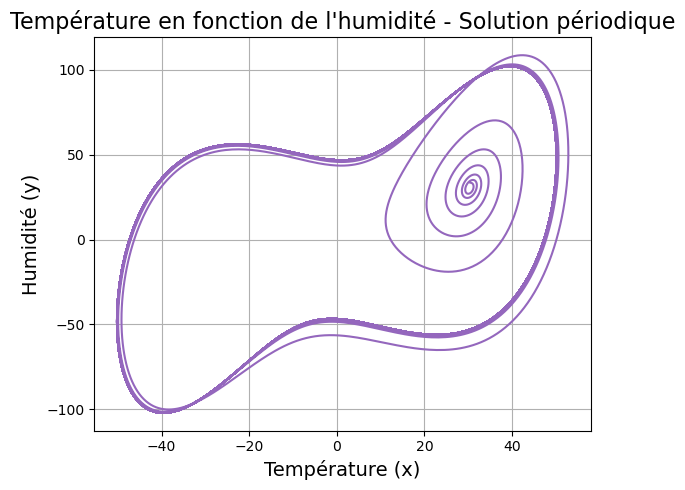

In [49]:
# 1.2.3 Graphique de x en fonction de y

plt.figure(figsize=(6, 5))
plt.plot(x2, y2, color='tab:purple')
plt.title("Température en fonction de l'humidité - Solution périodique", fontsize=16)
plt.xlabel("Température (x)", fontsize=14)
plt.ylabel("Humidité (y)", fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.savefig("Graph_sol_periodique_xy.png", dpi=300)
plt.show()

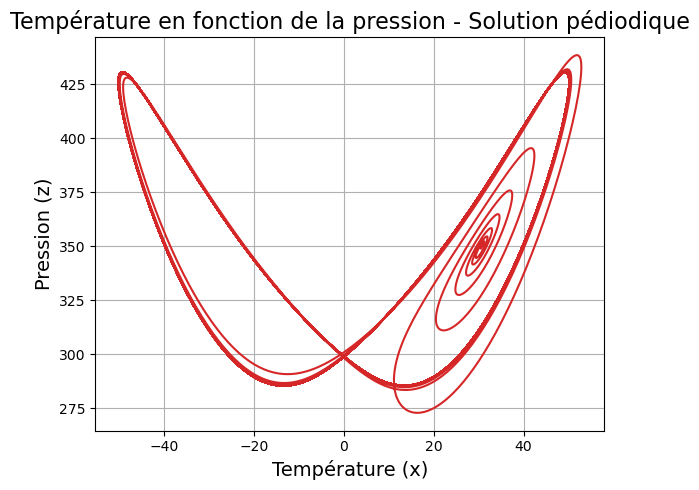

In [50]:
# 1.2.4 Graphique de x en fonction de z

plt.figure(figsize=(6, 5))
plt.plot(x2, z2, color='tab:red')
plt.title("Température en fonction de la pression - Solution pédiodique", fontsize=16)
plt.xlabel("Température (x)", fontsize=14)
plt.ylabel("Pression (z)", fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.savefig("Graph_sol_periodique_xz.png", dpi=300)
plt.show()

In [51]:
# 1.3 - Solution chaotique

# 1.3.1 - Simulations

# Exécution de la simulation, en changeant seulement la variable rho pour 28.0
x3, y3, z3 = lorenz_euler(rho=28.0)

print(f"Nombre de points simulés : {len(x3)}")

Nombre de points simulés : 20001


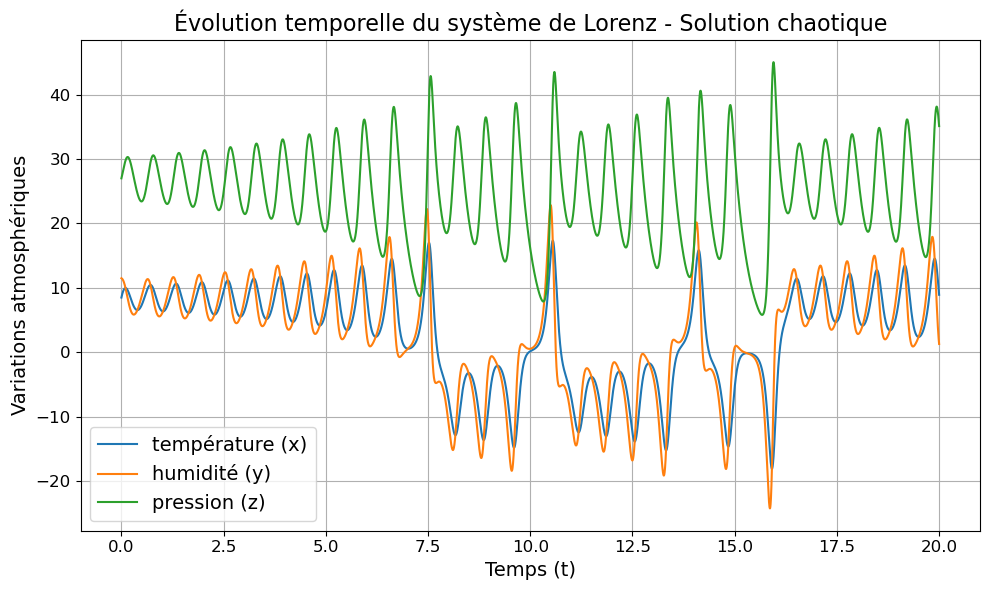

In [52]:
# 1.3.2 Graphique de x,y,z en fonction du temps

# Création de l'axe du temps
dt = 0.001
N = 20000
t = [i * dt for i in range(N + 1)]

# Graphique
plt.figure(figsize=(10, 6))

plt.plot(t, x3, label='température (x)', color='tab:blue')
plt.plot(t, y3, label='humidité (y)', color='tab:orange')
plt.plot(t, z3, label='pression (z)', color='tab:green')

plt.title("Évolution temporelle du système de Lorenz - Solution chaotique", fontsize=16)
plt.xlabel("Temps (t)", fontsize=14)
plt.ylabel("Variations atmosphériques", fontsize=14)
plt.tick_params(axis='both', labelsize=12)
plt.legend(fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.savefig("Graph_sol_chaotique.png", dpi=300)
plt.show()

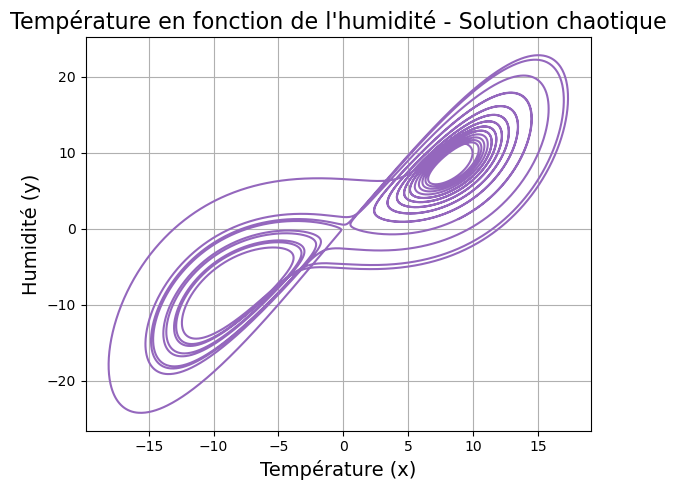

In [53]:
# 1.3.3 Graphique de x en fonction de y

plt.figure(figsize=(6, 5))
plt.plot(x3, y3, color='tab:purple')
plt.title("Température en fonction de l'humidité - Solution chaotique", fontsize=16)
plt.xlabel("Température (x)", fontsize=14)
plt.ylabel("Humidité (y)", fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.savefig("Graph_sol_chaotique_xy.png", dpi=300)
plt.show()

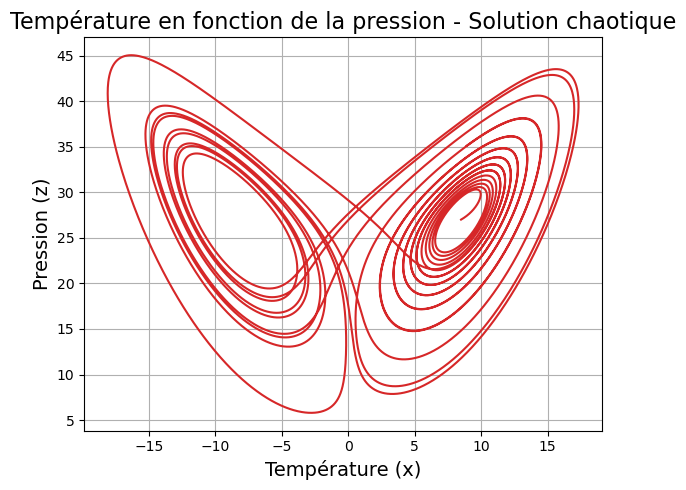

In [54]:
# 1.3.4 Graphique de x en fonction de z

plt.figure(figsize=(6, 5))
plt.plot(x3, z3, color='tab:red')
plt.title("Température en fonction de la pression - Solution chaotique", fontsize=16)
plt.xlabel("Température (x)", fontsize=14)
plt.ylabel("Pression (z)", fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.savefig("Graph_sol_chaotique_xz.png", dpi=300)
plt.show()

In [55]:
# Partie 2 - Prévisibilité du système chaotique

# 2.1 - Prévisibilité moyenne

# 2.1.1 - Paramètres numériques
dt = 0.001
N2 = 4 * 10**4         
t2 = np.arange(N2 + 1) * dt
eps = 0.01 #légère perturbation             

# Fonction CI (conditions initiales)
def lorenz_euler_CI(rho, dt, N, x0, y0, z0):
    sigma = 10.0
    beta = 2.667

    x, y, z = [x0], [y0], [z0]
    for i in range(N):
        x_next = (sigma * (y[i] - x[i])) * dt + x[i]
        y_next = ((x[i] * (rho - z[i]) - y[i])) * dt + y[i]
        z_next = ((x[i] * y[i] - beta * z[i])) * dt + z[i]

        x.append(x_next)
        y.append(y_next)
        z.append(z_next)
    return x, y, z

# --- Définition de rho et calcul de η ---
rho_val = 28.0
eta = math.sqrt(2.667 * (rho_val - 1))

# --- Conditions initiales ---
CI_control = [eta, eta + 3, rho_val - 1]         # trajectoire contrôle
CI_perturbed = [eta + eps, eta + 3, rho_val - 1] # trajectoire perturbée

# --- Simulations ---
x_ctrl, y_ctrl, z_ctrl = lorenz_euler_CI(rho_val, dt, N2, *CI_control)
x_pert, y_pert, z_pert = lorenz_euler_CI(rho_val, dt, N2, *CI_perturbed)

print(f"Nombre de points simulés : {len(x_ctrl)}")

Nombre de points simulés : 40001


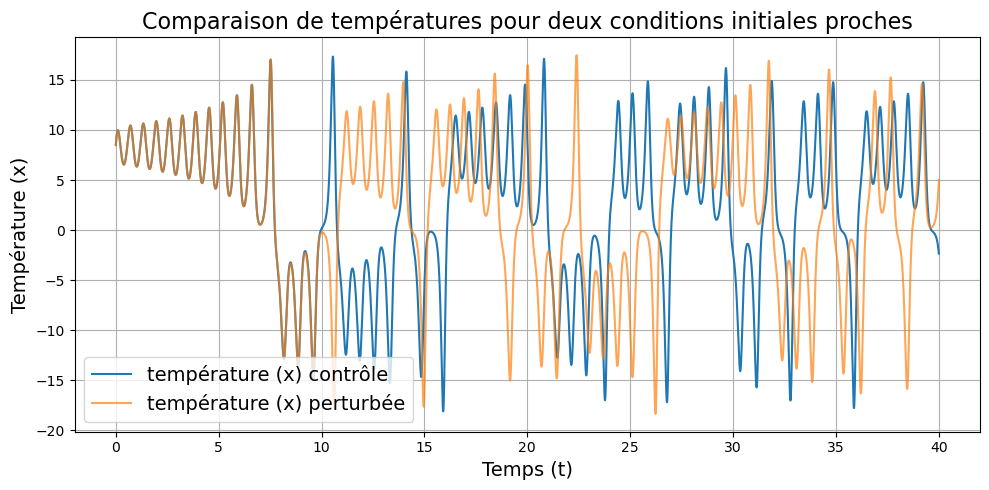

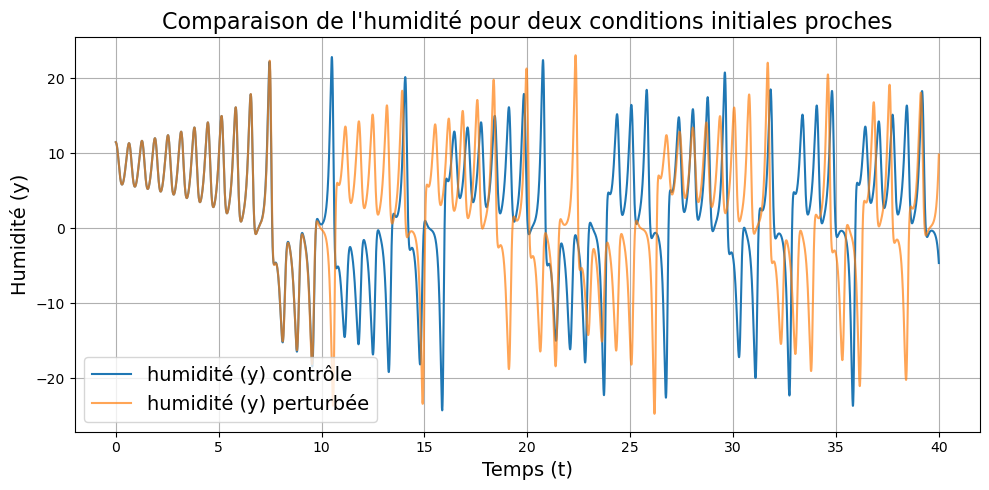

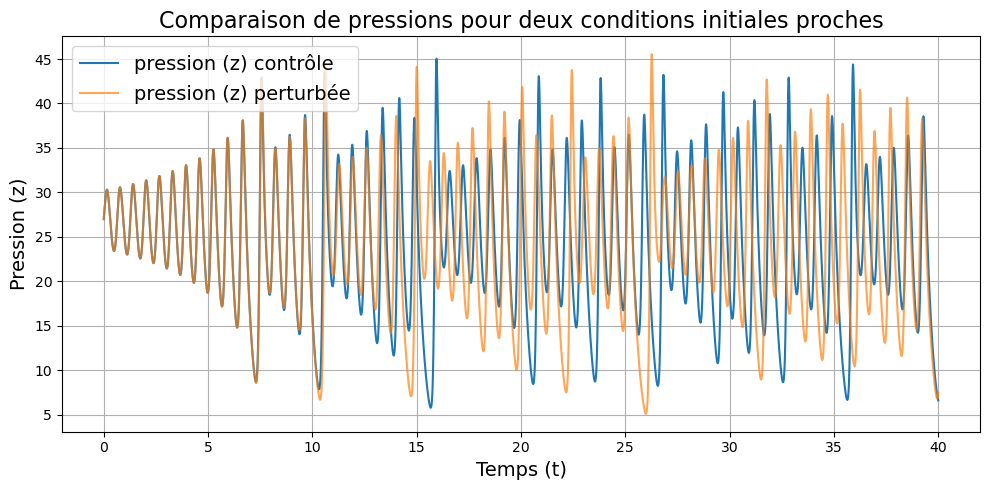

In [56]:
# 2.1.2 - Graphiques pour comparer la simulation contrôle avec la simulation perturbée, 
# pour chaque variable x, y et z


# Conversion en arrays
Xc = np.array(x_ctrl)
Yc = np.array(y_ctrl)
Zc = np.array(z_ctrl)

Xp = np.array(x_pert)
Yp = np.array(y_pert)
Zp = np.array(z_pert)

# Axe du temps
t2 = np.arange(len(Xc)) * dt  # dt défini précédemment

# Graphique de x(t) 
plt.figure(figsize=(10,5))
plt.plot(t2, Xc, label='température (x) contrôle', color='tab:blue')
plt.plot(t2, Xp, label='température (x) perturbée', color='tab:orange', alpha=0.7)
plt.title("Comparaison de températures pour deux conditions initiales proches", fontsize=16)
plt.xlabel("Temps (t)", fontsize=14)
plt.ylabel("Température (x)", fontsize=14)
plt.legend(fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.savefig("Graph_CI_x.png", dpi=300)
plt.show()

# --- Graphique de y(t) ---
plt.figure(figsize=(10,5))
plt.plot(t2, Yc, label='humidité (y) contrôle', color='tab:blue')
plt.plot(t2, Yp, label='humidité (y) perturbée', color='tab:orange', alpha=0.7)
plt.title("Comparaison de l'humidité pour deux conditions initiales proches", fontsize=16)
plt.xlabel("Temps (t)", fontsize=14)
plt.ylabel("Humidité (y)", fontsize=14)
plt.legend(fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.savefig("Graph_CI_y.png", dpi=300)
plt.show()

# --- Graphique de z(t) ---
plt.figure(figsize=(10,5))
plt.plot(t2, Zc, label='pression (z) contrôle', color='tab:blue')
plt.plot(t2, Zp, label='pression (z) perturbée', color='tab:orange', alpha=0.7)
plt.title("Comparaison de pressions pour deux conditions initiales proches", fontsize=16)
plt.xlabel("Temps (t)", fontsize=14)
plt.ylabel("Pression (z)", fontsize=14)
plt.legend(fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.savefig("Graph_CI_y.png", dpi=300)
plt.show()

In [57]:
#2.1.3 - Calcul des écarts-types
sigma_x = np.std(Xc)
sigma_y = np.std(Yc)
sigma_z = np.std(Zc)

print(f"Écart type de x(t) : σ_x = {sigma_x:.4f}")
print(f"Écart type de y(t) : σ_y = {sigma_y:.4f}")
print(f"Écart type de z(t) : σ_z = {sigma_z:.4f}")

Écart type de x(t) : σ_x = 7.6167
Écart type de y(t) : σ_y = 8.5850
Écart type de z(t) : σ_z = 8.1016


In [58]:
#2.1.4 - Identification du premier pas où la différence absolue entre la solution perturbée et la solution contrôle 
# est plus grande que l'écart-type de la variable x

# Conversion en arrays si ce n'est pas déjà fait
Xc = np.array(x_ctrl)
Xp = np.array(x_pert)
t2_array = np.array(t2)  # axe du temps correspondant

# Écart type de x(t) pour la trajectoire contrôle
sigma_x = np.std(Xc)

# Différence absolue entre les trajectoires
diff_x = np.abs(Xp - Xc)

# Identification du premier pas de temps où la différence dépasse l'écart-type
indices_exceed = np.where(diff_x > sigma_x)[0]

if len(indices_exceed) > 0:
    t_predict = t2_array[indices_exceed[0]]
    print(f"Premier pas de temps où |x_pert - x_ctrl| > σ_x : t_predict = {t_predict:.4f}")
else:
    print("La différence n'a jamais dépassé l'écart type sur toute la simulation.")

Premier pas de temps où |x_pert - x_ctrl| > σ_x : t_predict = 10.3610


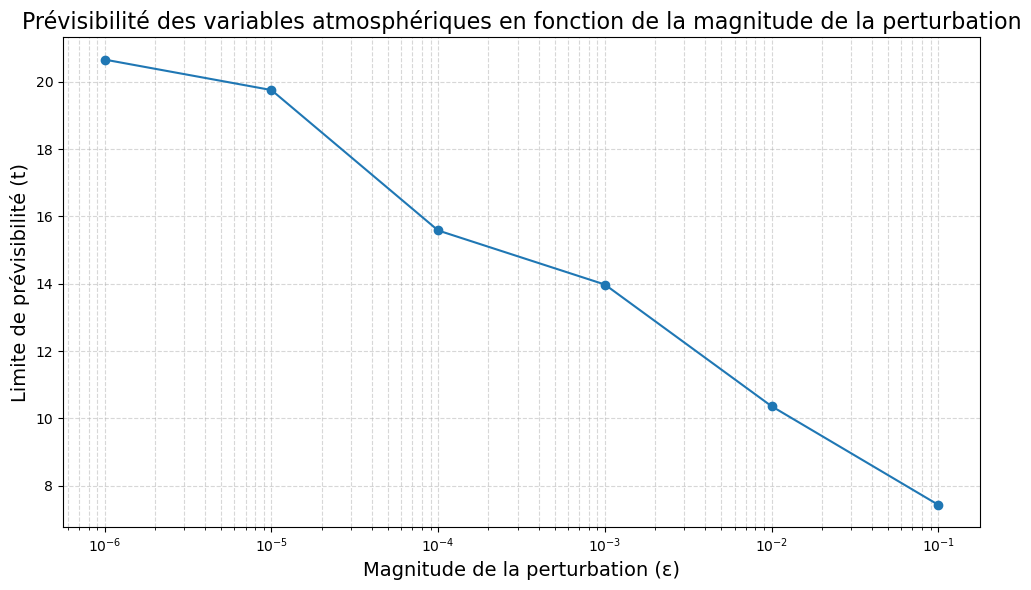

In [59]:
#2.2 Prévisibilité selon l'incertitude observationnelle

# Liste des perturbations 
eps_list = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]

# Stockage des temps de prévisibilité
t_predict_list = []

# Boucle sur les perturbations
for eps in eps_list:
    CI_control = [eta, eta + 3, rho_val - 1]
    CI_perturbed = [eta + eps, eta + 3, rho_val - 1]

    # Simulations
    x_ctrl, y_ctrl, z_ctrl = lorenz_euler_CI(rho_val, dt, N2, *CI_control)
    x_pert, y_pert, z_pert = lorenz_euler_CI(rho_val, dt, N2, *CI_perturbed)

    # Conversion en arrays
    Xc = np.array(x_ctrl)
    Xp = np.array(x_pert)
    t_array = np.array(t2)

    # Écart type de x(t) pour la trajectoire contrôle
    sigma_x = np.std(Xc)

    # Différence absolue
    diff_x = np.abs(Xp - Xc)

    # Premier temps où la différence dépasse l’écart type
    indices_exceed = np.where(diff_x > sigma_x)[0]
    if len(indices_exceed) > 0:
        t_predict = t_array[indices_exceed[0]]
    else:
        t_predict = np.nan  # si jamais la différence n'atteint pas sigma_x

    t_predict_list.append(t_predict)

# --- Graphique de la prévisibilité ---
plt.figure(figsize=(10,6))
plt.plot(eps_list, t_predict_list, marker='o', linestyle='-')
plt.xscale('log')  # axe logarithmique pour la magnitude de la perturbation
plt.xlabel("Magnitude de la perturbation (ε)", fontsize=14)
plt.ylabel("Limite de prévisibilité (t)", fontsize=14)
plt.title("Prévisibilité des variables atmosphériques en fonction de la magnitude de la perturbation", fontsize=16)
plt.grid(True, which='both', ls='--', alpha=0.5)
plt.tight_layout()
plt.savefig("Graph_prévisibilité_incert_obs", dpi=300)
plt.show()

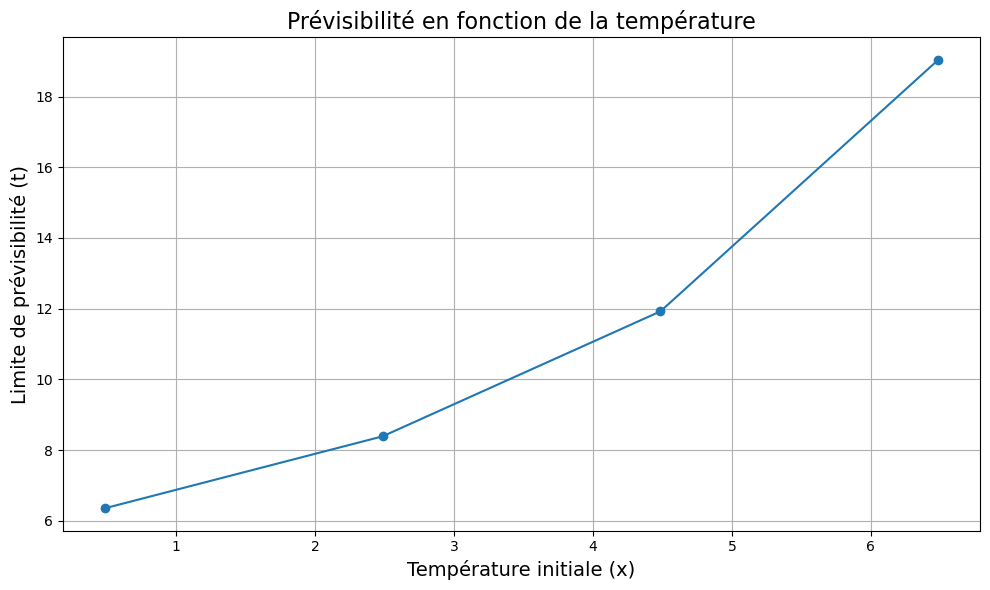

In [60]:
# 2.3 - Prévisibilité selon le "régime de temps"

# Paramètre numérique pour la perturbation (fixe ici)
eps = 0.01 

# --- Liste des conditions initiales contrôle ---
CI_list = [
    [eta - 2, eta + 1, rho_val - 1],
    [eta - 4, eta - 1, rho_val - 1],
    [eta - 6, eta - 3, rho_val - 1],
    [eta - 8, eta - 5, rho_val - 1]
]

# Stockage des valeurs de x0 et temps de prévisibilité
x0_list = []
t_predict_list = []

# Boucle sur toutes les conditions initiales
for CI_control in CI_list:
    x0 = CI_control[0]
    x0_list.append(x0)

    # Trajectoire perturbée
    CI_perturbed = [x0 + eps, CI_control[1], CI_control[2]]

    # Simulations
    x_ctrl, y_ctrl, z_ctrl = lorenz_euler_CI(rho_val, dt, N2, *CI_control)
    x_pert, y_pert, z_pert = lorenz_euler_CI(rho_val, dt, N2, *CI_perturbed)

    # Conversion en arrays
    Xc = np.array(x_ctrl)
    Xp = np.array(x_pert)
    t_array = np.array(t2)

    # Écart type de x(t) pour la trajectoire contrôle
    sigma_x = np.std(Xc)

    # Différence absolue
    diff_x = np.abs(Xp - Xc)

    # Premier temps où la différence dépasse l’écart-type
    indices_exceed = np.where(diff_x > sigma_x)[0]
    if len(indices_exceed) > 0:
        t_predict = t_array[indices_exceed[0]]
    else:
        t_predict = np.nan  # si jamais la différence n'atteint pas sigma_x

    t_predict_list.append(t_predict)

# --- Graphique de prévisibilité ---
plt.figure(figsize=(10,6))
plt.plot(x0_list, t_predict_list, marker='o', linestyle='-')
plt.xlabel("Température initiale (x)", fontsize=14)
plt.ylabel("Limite de prévisibilité (t)", fontsize=14)
plt.title("Prévisibilité en fonction de la température", fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.savefig("Graph_prévisibilité_régime_temps", dpi=300)
plt.show()

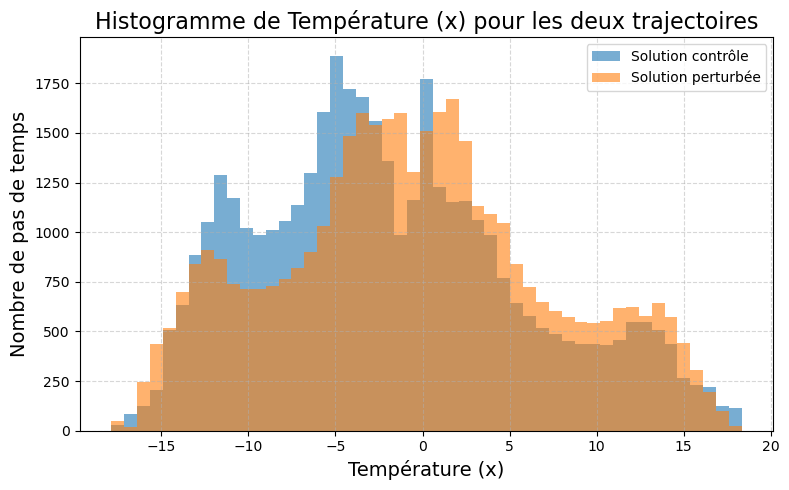

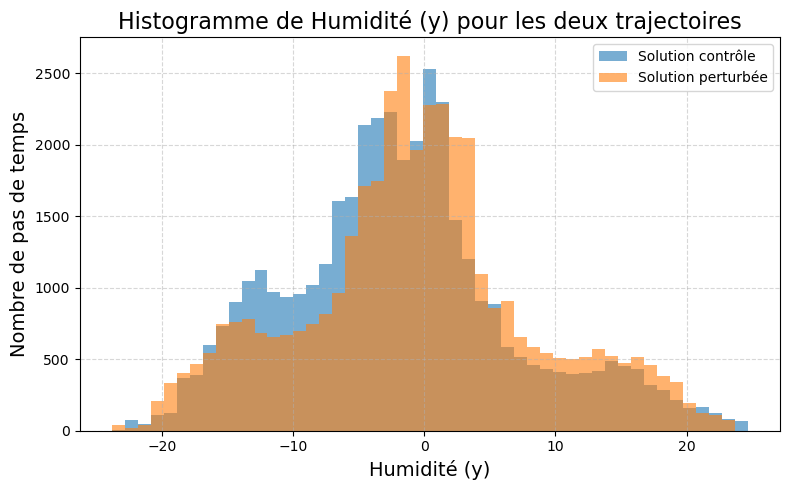

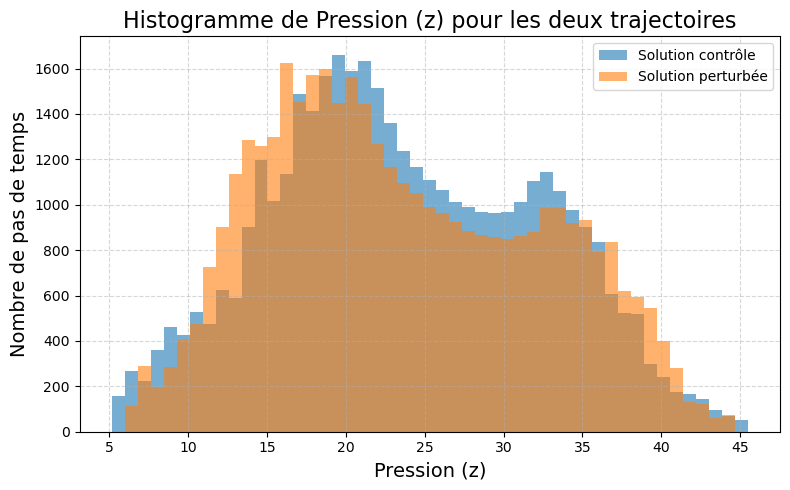

In [61]:
# Partie 3 - Climat du système chaotique

# 3.1 - Exploration visuelle des différences 

# Conversion en arrays (de toutes les variables atmosphériques, pas seulement x)
Xc = np.array(x_ctrl)
Yc = np.array(y_ctrl)
Zc = np.array(z_ctrl)

Xp = np.array(x_pert)
Yp = np.array(y_pert)
Zp = np.array(z_pert)

# Liste des variables pour boucler
variables = [
    (Xc, Xp, "Température (x)"),
    (Yc, Yp, "Humidité (y)"),
    (Zc, Zp, "Pression (z)")
]

for var_ctrl, var_pert, label in variables:
    # Détermination des bins communs
    vmin = min(var_ctrl.min(), var_pert.min())
    vmax = max(var_ctrl.max(), var_pert.max())
    bins = np.linspace(vmin, vmax, 50)

    plt.figure(figsize=(8,5))
    plt.hist(var_ctrl, bins=bins, alpha=0.6, label="Solution contrôle", color='tab:blue')
    plt.hist(var_pert, bins=bins, alpha=0.6, label="Solution perturbée", color='tab:orange')
    plt.xlabel(label, fontsize=14)
    plt.ylabel("Nombre de pas de temps", fontsize=14)
    plt.title(f"Histogramme de {label} pour les deux trajectoires", fontsize=16)
    plt.legend()
    plt.grid(True, ls='--', alpha=0.5)
    plt.tight_layout()
    plt.savefig("Histogramme_min_max", dpi=300)
    plt.show()

In [62]:
# 3.2 - Exploration statistique des différences
#test kolmogorov-smirnov

print("Test KS à deux échantillons :")
for var_ctrl, var_pert, label in variables:
    stat, p_value = ks_2samp(var_ctrl, var_pert)
    print(f"{label}: stat={stat:.4f}, p-value={p_value:.4e}")

Test KS à deux échantillons :
Température (x): stat=0.1030, p-value=2.8731e-185
Humidité (y): stat=0.0973, p-value=2.4353e-165
Pression (z): stat=0.0453, p-value=3.5200e-36


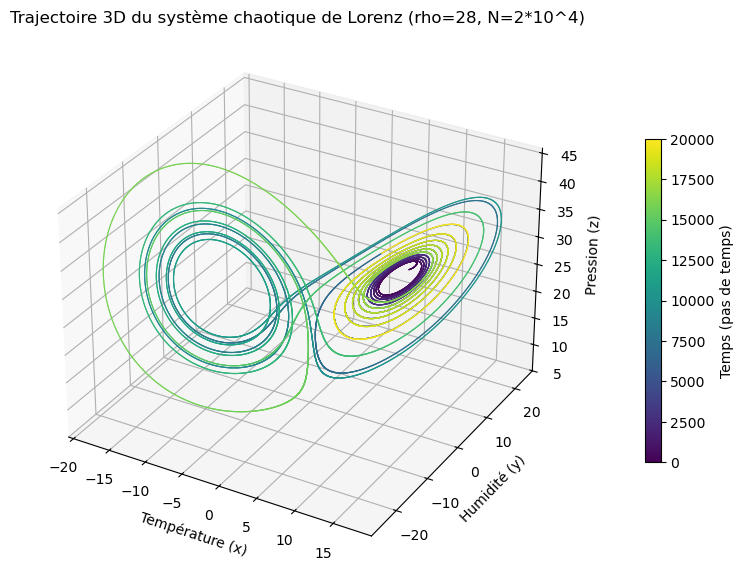

In [63]:
# Partie 4 - Figure bonus

# Conversion en array
x = np.array(x3)
y = np.array(y3)
z = np.array(z3)

# Dégradé de couleur selon le temps
t_colors = np.linspace(0, 1, len(x))  # normalisé entre 0 et 1
cmap = plt.cm.viridis  # choix du colormap

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# Tracer la trajectoire avec couleur qui évolue
for i in range(len(x)-1):
    ax.plot(x[i:i+2], y[i:i+2], z[i:i+2], color=cmap(t_colors[i]), lw=0.8)

ax.set_xlabel("Température (x)")
ax.set_ylabel("Humidité (y)")
ax.set_zlabel("Pression (z)")
ax.set_title("Trajectoire 3D du système chaotique de Lorenz (rho=28, N=2*10^4)")

# Ajouter une légende de couleur pour le nombre de pas de temps
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=len(x)))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, shrink=0.6, pad=0.1)
cbar.set_label("Temps (pas de temps)")
plt.savefig("Graph_3d_2x10_4", dpi=300)
plt.show()

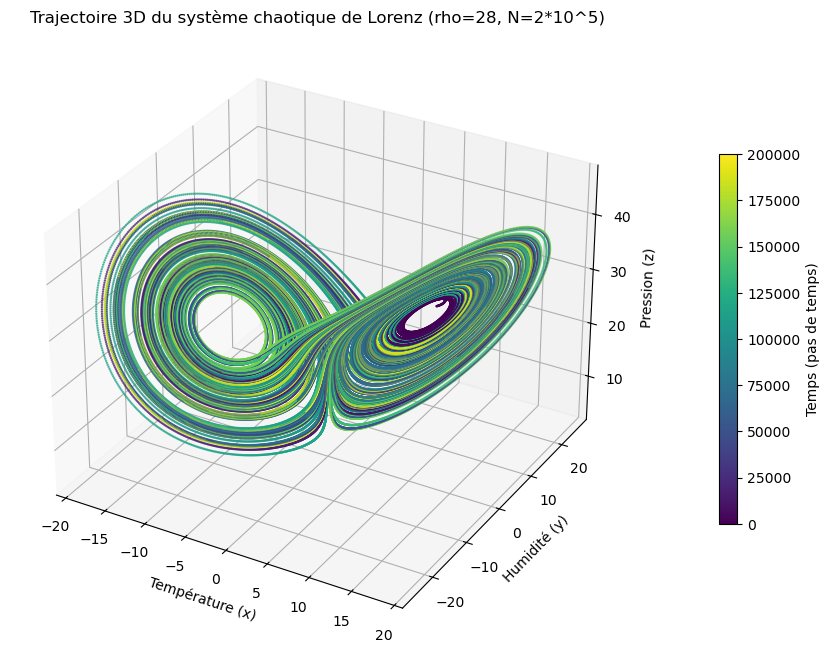

In [67]:
# Partie 4 - Figure bonus (suite)

# Répétition des paramètres du système
sigma = 10.0
beta = 2.667
rho_val = 28.0

# Spécification des paramètres numériques
dt = 0.001
N = 200_000  # beaucoup plus de points pour une trajectoire continue
t = np.arange(N + 1) * dt

# Répétition des conditions initiales
eta = math.sqrt(beta * (rho_val - 1))
x0, y0, z0 = eta, eta + 3, rho_val - 1

# Répétition de l'intégration par Euler
x, y, z = [x0], [y0], [z0]
for i in range(N):
    x_next = x[i] + sigma * (y[i] - x[i]) * dt
    y_next = y[i] + (x[i] * (rho_val - z[i]) - y[i]) * dt
    z_next = z[i] + (x[i] * y[i] - beta * z[i]) * dt
    x.append(x_next)
    y.append(y_next)
    z.append(z_next)

x = np.array(x)
y = np.array(y)
z = np.array(z)

# Dégradé de couleur selon le temps
t_colors = np.linspace(0, 1, len(x))
cmap = plt.cm.viridis

# Graphique 3D
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

# Points semi-transparents pour un rendu dense
ax.scatter(x, y, z, c=t_colors, cmap=cmap, s=0.5, alpha=0.7)

ax.set_xlabel("Température (x)")
ax.set_ylabel("Humidité (y)")
ax.set_zlabel("Pression (z)")
ax.set_title("Trajectoire 3D du système chaotique de Lorenz (rho=28, N=2*10^5)")

# Légende pour le temps
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=len(x)))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, shrink=0.6, pad=0.1)
cbar.set_label("Temps (pas de temps)")

plt.savefig("Graph_3d_2x10_5", dpi=300)
plt.show()